In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Using MPI version 4.0, 1 processes


In [2]:
def run_sim(rot_angle=0):

    resolution = 50  # pixels/μm

    cell_size = mp.Vector3(14, 10, 0)

    pml_layers = [mp.PML(thickness=2, direction=mp.X)]

    fsrc = 1.0  # frequency of planewave (wavelength = 1/fsrc)

    n = 1.5  # refractive index of homogeneous material
    default_material = mp.Medium(index=n)

    k_point = mp.Vector3(fsrc * n).rotate(mp.Vector3(z=1), rot_angle)

    sources = [
        mp.EigenModeSource(
            src=mp.ContinuousSource(fsrc),
            center=mp.Vector3(),
            size=mp.Vector3(y=10),
            direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
            eig_kpoint=k_point,
            eig_band=1,
            eig_parity=mp.EVEN_Y + mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
            eig_match_freq=True,
        )
    ]

    sim = mp.Simulation(
        cell_size=cell_size,
        resolution=resolution,
        boundary_layers=pml_layers,
        sources=sources,
        k_point=k_point,
        default_material=default_material,
        symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [],
    )

    sim.run(until=100)

    plt.figure(dpi=100)
    sim.plot2D(fields=mp.Ez)
    plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000126839 s
Working in 2D dimensions.
Computational cell is 14 x 10 x 0 with resolution 50
time for set_epsilon = 0.394255 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.59627,0.51303,0) = 1 after 69 iters
Meep progress: 8.52/100.0 = 8.5% done in 4.0s, 43.0s to go
on time step 852 (time=8.52), 0.00470009 s/step
Meep progress: 17.19/100.0 = 17.2% done in 8.0s, 38.6s to go
on time step 1719 (time=17.19), 0.00461663 s/step
Meep progress: 25.71/100.0 = 25.7% done in 12.0s, 34.7s to go
on time step 2571 (time=25.71), 0.00469872 s/step
Meep progress: 33.97/100.0 = 34.0% done in 16.0s, 31.1s to go
on time step 3397 (time=33.97), 0.00484463 s/step
Meep progress: 42.04/100.0 = 42.0% done in 20.0s, 27.6s to go
on time step 4204 (time=42.04), 0.00496002 s/step
Meep progress: 49.730000000000004/100.0 = 49.7% done in 24.0s, 24.3s to go
on time step 4973 (time=49.73), 0.00520596 s/step
Meep progress: 57.9

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


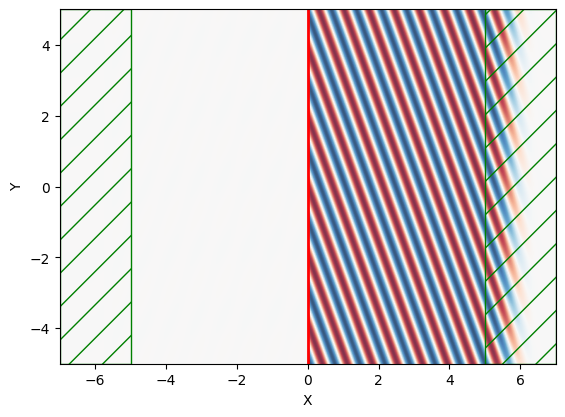

In [3]:
run_sim(rot_angle=np.radians(20))